# Using Selenium for Advanced Web Crawling
   
   ####                                         By Miriam Rodriguez



## In this tutorial, we will be capturing data with Selenium. 
## We will have some fun experimenting with the different commands.

## Selenium

Selenium is a powerful framework designed to automate testing for web applications. It provides a way for developers to write tests in a number of programming languages such as C#, Java, Python, Ruby, etc. The tests can run against most web browsers such as Chrome, IE and Firefox.  

Selenium automates browsers. Out of the box Selenium allows one to open a web browser, go to a page, and do any action a human could do (clicking button, filling in forms, etc), in addition to the base task of parsing html for information. Selenium can be used in combination with Scrapy and can be used in the PyCharm IDE. 

### This is an example of how Selenium can be used.  For this example we will obtain a review from www.loudersound.com (formerly www.teamrock.com)

## Scenario
- installation instructions for Selenium
- discussion of the web drivers for the different browsers
- import the necessary packages and set the options
- start the url for www.loudersound.com/reviews
- go through the different Selenium commands and follow along with the 'open' chrome session. 
- save a screen shot of the webpage
- save the html source for future use
- capture the text of a review 

## How to Install Selenium (Windows):

For the purposes of this tutorial, we will focus on the Windows setup.

Using the command prompt:

- pip install selenium

To upgrade the currently installed Selenium Webdriver package: 
    
- pip install -U selenium    



## How to Set Webdrivers for Selenium (Windows)

### Firefox: 
driver = webdriver.Firefox()

### iPhone:
driver = webdriver.Remote(browser_name="iphone", command_executor='http://172.24.101.36:3001/hub')
 
### Android:
driver = webdriver.Remote(browser_name="android", command_executor='http://127.0.0.1:8080/hub')

### Google Chrome: 
For Selenium to utilize Chrome, the driver has to be downloaded. 

Download Chrome Driver from:

http://chromedriver.storage.googleapis.com/2.9/chromedriver_win32.zip or 
https://sites.google.com/a/chromium.org/chromedriver/downloads

Paste the chromedriver.exe file in "C:\Python27\Scripts" Folder (or anywhere that you wish, just make sure you point to it when setting the driver).

The Chrome webdriver can be represented in one of the following formats:

- driver = webdriver.Chrome(executable_path=r"C:\Python27\Scripts\chromedriver.exe")

If you do not want to use a raw string you can escape the slash as \\:

- driver = webdriver.Chrome(executable_path="C:\\Python27\\Scripts\\chromedriver.exe")

Or replace the \ with a /, you will get this:

- driver = webdriver.Chrome(executable_path="C:/Chrome/chromedriver.exe")

## Perform import of the packages and API's

In [51]:
from selenium import webdriver
%matplotlib inline
import time,re,json,numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import requests
from lxml import html
import csv
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait



#### Set the options and set the arguments for chromium to work on Selenium

In [52]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument("--test-type")
options.binary_location = "/usr/bin/chromium"
options.add_argument("--no-sandbox") #This make Chromium reachable
options.add_argument("--no-default-browser-check") #Overrides default choices
options.add_argument("--no-first-run")
options.add_argument("--disable-default-apps") 



### For this tutorial we will use the Chrome driver

#### The below will open up a Chrome browser.  It will indicate that it is controlled by automated test software.

In [53]:
# Set the Chrome driver
driver = webdriver.Chrome(executable_path="C:/Python27/Scripts/chromedriver.exe")


#### This will start the URL. We are on the first page of the website.

In [54]:
driver.get('http://loudersound.com/reviews/')

#### Return the title. When you hover over the tab for the web page, this is what you will see.

In [55]:
driver.title

u'Reviews | Louder'

#### Other commands to determine if you are in the right place and to verify the driver instance.

### You can pull Html code to your computer and save it.  This data can be parsed later for analysis.

In [56]:
websource = driver.page_source

In [57]:
websource

u'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en" dir="ltr" data-aliased-locale="HK" data-locale="GB"><link href="//www.loudersound.com/20180324/media/css/loudersound.min.css" rel="stylesheet" type="text/css" /><head>\n<script type="text/javascript" async="" src="//secure-uk.imrworldwide.com/v60a.js"></script><script type="text/javascript" async="" src="https://sb.scorecardresearch.com/c2/10055482/cs.js"></script><script id="ffte-js" src="//www.loudersound.com/20180324/media/shared/js/app.js" async="1"></script><script async="" defer="" src="//www.googletagmanager.com/gtm.js?id=GTM-KJXC4JK"></script><script src="https://pagead2.googlesyndication.com/pagead/osd.js"></script><script src="https://securepubads.g.doubleclick.net/gpt/pubads_impl_rendering_192.js"></script><script src="https://securepubads.g.doubleclick.net/static/glade/extra_26.js"></script><script data-main="//www.loudersound.com/20180324/media/js/main.min.js" src="//www.loudersound.com/20180324/media/js

#### Find text for 'Led Zeppelin' review

In [58]:
driver.find_element_by_partial_link_text('Led Zeppelin')

<selenium.webdriver.remote.webelement.WebElement (session="efbd1159088fd429f3788330c8da149b", element="0.47182962939527684-1")>

### Add this method to click it! This will select the 'Led Zeppelin' article. Check the open Chrome session!

In [59]:
driver.find_element_by_partial_link_text('Led Zeppelin').click()

### Navigate back with the browser buttons. This will go back to the previous screen. 

In [60]:
driver.back()

### Navigate forward with the browser buttons. This will go forward to the Led Zeppelin screen. 

In [61]:
driver.forward()

### Scroll to the bottom of the page

In [62]:
driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

### Save a screenshot in the directory you are in 

In [63]:
driver.save_screenshot('loudersound_shot.png')

True

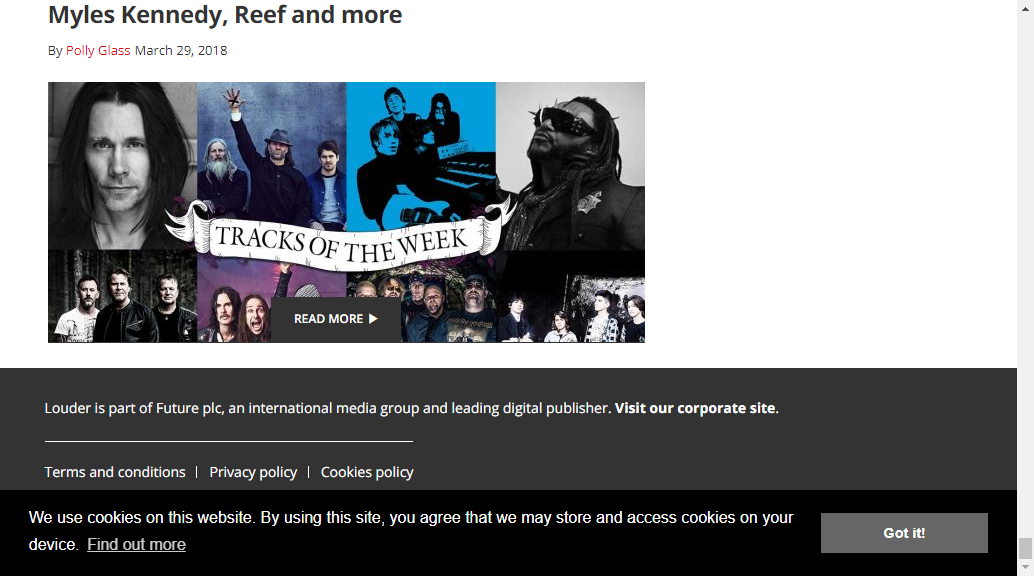

In [64]:
# Include images in ipython notebook
from IPython.display import Image
Image("loudersound_shot.png")

### Navigate back again with the browser buttons. This will go back to the previous screen. 

In [65]:
driver.back()

#### Find the next review on the page

In [66]:
url = driver.find_element(By.XPATH, "//a[contains(@href, 'loudersound.com/reviews/')]")

#### Click on the review

In [67]:
url.click()

### Grab the review

In [68]:
review = driver.find_element(By.XPATH, '//*[@id="article-body"]') 


### 'review' contains all of the parts of the review.  This can be used to perform sentiment analysis.  

In [69]:
print review.text


LED ZEPPELIN - PRESENCE
1. Achilles Last Stand
2. For Your Life
3. Royal Orleans
4. Nobody's Fault But Mine
5. Candy Store Rock
6. Hots On For Nowhere
7. Tea For One
Buy from Amazon
When Led Zeppelin's Presence was released on March 31, 1976 it was another instant No.1 hit, going gold in the UK (platinum in the US) on advance sales alone, and becoming the fastest-selling album in the Atlantic Records group’s history. Reviews were generally good too.
But sales soon tailed off, just as they had for Led Zeppelin III and Houses Of The Holy, initial excitement failing to translate into wider general interest among non-partisan record buyers as what was – correctly – perceived as the album’s generally depressing ambience became known.
Depressing was hardly surprising. Before Presence Zeppelin were at the very top of the mountain, able to look down on nearest rivals such as the Rolling Stones and Pink Floyd from a considerable height. Unstoppable, unbreachable, invulnerable, nothing could go 

# Here are other commands that can be used:
Prefix with driver
- driver.find_element_by_id()
        .find_element_by_name()
        .find_element_by_xpath()
        .find_element_by_tag_name()
        .find_element_by_class_name()
        .find_element_by_css_selector()



### This command will actually close the webdriver and the Chrome session.

In [70]:
driver.close()

### References:
- www.stackoverflow.com
- www.seleniumhq.org
- codeburst.io/how-to-collect-data-through-web-scraping-using-selenium
- sqa.stackexchange.com
- medium.com

## This was a demonstration of how Selenium navigates through a browser and mimic a human.  There are many ways Selenium can be implemented.  This is one instance of how it can be used.